오늘코드 실습 영상 : https://youtu.be/-Aij-QrpOuY

## RFM(Recency, Frequency, Monetary)

* RFM은 가치있는 고객을 추출해내어 이를 기준으로 고객을 분류할 수 있는 매우 간단하면서도 유용하게 사용될 수 있는 방법으로 알려져 있어 마케팅에서 가장 많이 사용되고 있는 분석방법 중 하나이다. RFM은 구매 가능성이 높은 고객을 선정하기 위한 데이터 분석방법으로서, 분석과정을 통해 데이터는 의미있는 정보로 전환된다.

* RFM은 Recency, Frequency, Monetary의 약자로 고객의 가치를 다음의 세 가지 기준에 의해 계산하고 있다.

* Recency - 거래의 최근성: 고객이 얼마나 최근에 구입했는가?
* Frequency - 거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?
* Monetary - 거래규모: 고객이 구입했던 총 금액은 어느 정도인가?

### RFM 모형

* Scoring 기법: RFM의 요인을 각각 5등급으로 등간격으로 분류하는 방법이다.
* 현재 개발된 RFM 모형은 크게 4가지로 분류 할 수 있다. 이 문서의 내용들은 정설이 아니며 신뢰하기 어려움을 전제로 참고해야한다.
    * 모델1. RFM 각 요소의 20% rule의 적용
    * 모델2. 비율 척도에 의한 양적인 정도의 차이에 따른 등간격의 5등급 분류
    * 모델3. 상하 20%를 제외한 등간격 척도에 의한 그룹 분류
    * 모델4. 군집 분석에 의한 각 요소 별 5개의 그룹 분류
* Data Mining 기법을 이용한 모형
* 회귀분석
* 선형 회귀 분석을 이용한 모형: 고객의 구매 최근성, 구매 빈도, 구매 금액 등 고객의 수익 기여도를 나타내는 세가지 지표들의 선형결합으로 세가지 지표들을 점수화 한다.
* 다중 회귀 분석을 이용한 모형: 각 고객의 구매 행동을 나타내는 R,F,M의 변수들을 독립변수로하고 고객의 미래 구매 행동을 예측하는 기법.
* 신경망을 적용한 모형: 로지스틱 회귀 모형을 보완하는 차원에서 연구.
* 확률적 RFM모형:Colombo와 Weina의 확률적인 RFM모형은 과거의 고객의 응답 이력으로 고객의 미래 응답을 예측하는 행동모델이다.

* 출처 : [RFM - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/RFM)
* 참고 기사 : http://www.itdaily.kr/news/articleView.html?idxno=8371



### 파레토 법칙

* 상위 고객의 20%가 기업 총 매출의 80%를 차지한다.
* 80:20 법칙을 고려하면 고객 매출 데이터가 누적됨에 따라 마케팅에 데이터를 활용해 마케팅에 활용할 수 있다.
* [파레토 법칙 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%8C%8C%EB%A0%88%ED%86%A0_%EB%B2%95%EC%B9%99)
    
### 고객 세분화

* 상품과 서비스 판매정보 - 상품판매 자료 거래 금액, 횟수
* 인구통계학적 정보 - 나이, 성별, 직업, 학력, 거주지역, 소득수준
* 라이프 스타일 정보 - 순차적, 구매 정보, RFM 정보
* 심리 정보 - 구매욕구
* 행동 정보 - 구매패턴 Life Time Value
    
    
### RFM 관련 논문

[국회도서관 소장자료 -RFM을 적용한 고객 세분화 개선 및 우수고객 예측 모형에 관한 연구](http://dl.nanet.go.kr/law/SearchDetailView.do?cn=KDMT1200458026#none)

## 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## 데이터 로드

In [3]:
# raw = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
# raw = pd.read_excel("data/Online Retail.xlsx", engine="openpyxl")
# raw

raw = pd.read_parquet('data/online_retail.parquet')
raw.head(2)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# head
raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 유효 데이터만 추출

In [5]:
# "CustomerID" 가 있고 "Quantity" , "UnitPrice"가 0보다 큰 데이터를 가져옵니다.
# 구매하고 취소한 건 중 취소한 건만 제외하고 구매 건은 남깁니다.
# raw_valid
# copy는 깊은복사를 해줘서 raw_valid가 더이상 raw를 바라보지 않는다.
raw_valid = raw[raw["CustomerID"].notnull() & (raw["Quantity"] > 0) & (raw['UnitPrice'] > 0)].copy()

raw_valid.shape

(397884, 8)

## 구매 금액 계산

In [6]:
# TotalPrice 는 RFM 중 MonetaryValue의 값이 됩니다.
# raw_valid["TotalPrice"]

raw_valid["TotalPrice"] = raw_valid['UnitPrice'] * raw_valid['Quantity']
raw_valid.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [7]:
# 기술통계
raw_valid.describe()



,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


## 이상치 제거

In [8]:
# 범위를 설정하여 이상치를 찾습니다.
# 160000 보다 큰 값을 찾습니다.
raw_valid[raw_valid['TotalPrice'] > 160000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6


In [9]:
raw_valid[raw_valid['CustomerID'] == 16446]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom,1.65
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom,1.25
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60


In [10]:
# 이상치는 제외합니다.
# 160000 보다 큰 값을 제외합니다.
# raw_valid

raw_valid = raw_valid[raw_valid['TotalPrice'] < 160000].copy()
raw_valid.shape

(397883, 9)

In [11]:
raw_valid.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397883.000000,397883,397883.000000,397883.000000,397883.000000
mean,12.784706,2011-07-10 23:40:50.634985472,3.116490,15294.420558,21.973641
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,74215.000000,2011-12-09 12:50:00,8142.750000,18287.000000,77183.600000
std,125.209563,NaN,22.097904,1713.142740,155.599527


## 중복 데이터 확인
* 중복 데이터는 여러 이유로 발생할 수 있습니다. 네트워크 통신 문제나 쇼핑몰의 UI 구성 등의 다양한 이슈로 발생할 수 있습니다.
* 예를 들면 주문을 하고 새로고침을 했을 때 다시 주문 트랜잭션에 들어가거나 하는 이슈가 발생할 가능성도 있습니다.

In [12]:
# 중복 데이터 중 첫번째 것만(keep='first') 봅니다.
# keep은 중복 데이터 발견시에 어떤 데이터를 유지하고 제외할지 결정해주는 변수입니다. ('first', 'last','False'로 선택적 입력 가능)

raw_valid[raw_valid.duplicated(keep='last')].head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10


In [13]:
# 중복데이터 모두 출력(keep = False) 합니다.
raw_valid[raw_valid.duplicated(keep=False)].sort_values(['InvoiceNo', 'StockCode'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10
...,...,...,...,...,...,...,...,...,...
541655,581538,23275,SET OF 3 HANGING OWLS OLLIE BEAK,1,2011-12-09 11:34:00,1.25,14446.0,United Kingdom,1.25
541656,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2.49
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2.49
541666,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,2011-12-09 11:34:00,2.08,14446.0,United Kingdom,2.08


## 중복 데이터 제거

In [14]:
# drop_duplicates로 중복을 제거합니다.
# df

df = raw_valid.drop_duplicates().copy()
df.shape

(392691, 9)

## RFM 계산
### 전체 주문에서 최근 주문일 구하기

In [15]:
# InvoiceDate를 날짜형식으로 변환해 줍니다.
# df['InvoiceDate']
# 18:25

df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [16]:
# Recency 계산을 위해 해당 주문에서 가장 최근 구매가 일어난 시간을 가져옵니다.
# 최근 거래 기준일(last_timestamp)을 만들기 위해 timedelta로 날짜를 더해줍니다.(최소값:1 설정)
# last_timestamp
last_timestamp = df['InvoiceDate'].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2011-12-10 12:50:00')

### 고객별 Recency, Frequency, Monetary 값 구하기

In [17]:
# RFM 값을 정의합니다.
# Recency : 최근 거래 기준일(last_timestamp)과 고객별 최근 구매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액
# rfm

rfm = df.groupby('CustomerID').agg({'InvoiceDate' : lambda x : (last_timestamp - x.max()).days,
                              'InvoiceNo' : 'count',
                              'TotalPrice' : 'sum'})
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [18]:
# RFM 으로 변수의 이름을 변경합니다.
# InvoiceDate 는 Recency
# InvoiceNo 는 Frequency
# TotalPrice 는 MonetaryValue
# rfm

rfm = rfm.rename(columns= {'InvoiceDate' : 'Recency', 'InvoiceNo' : 'Frequency', 'TotalPrice' : 'MonetaryValue'})
rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [19]:
# describe
rfm.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304
std,100.019339,225.507058,8622.507371
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.452500
50%,51.000000,41.000000,668.495000
75%,142.750000,98.000000,1659.132500
max,374.000000,7676.000000,280206.020000


In [20]:
# boxplot
plt.figure(figsize=(6, 3))


<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

In [21]:
# boxplot
plt.figure(figsize=(6, 2))


<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

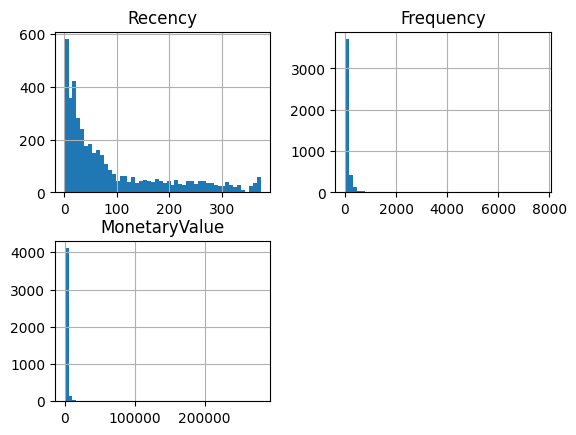

In [22]:
# hist
rfm.hist(bins=50);

## RFM 모형

* Scoring 기법: RFM의 요인을 각각 5등급으로 등간격으로 분류하는 방법이다.
* 현재 개발된 RFM 모형은 크게 4가지로 분류 할 수 있다. 이 문서의 내용들은 정설이 아니며 신뢰하기 어려움을 전제로 참고해야한다.
    * 모델1. RFM 각 요소의 20% rule의 적용
    * 모델2. 비율 척도에 의한 양적인 정도의 차이에 따른 등간격의 5등급 분류
    * 모델3. 상하 20%를 제외한 등간격 척도에 의한 그룹 분류
    * 모델4. 군집 분석에 의한 각 요소 별 5개의 그룹 분류
    
출처 : [RFM - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/RFM)

### qcut을 통한 RFM 변수 만들기

<img src="https://i.imgur.com/10LKZ9m.png" width="700">

In [23]:
# Recency 는 최근일수록 높은 스코어를 갖도록 합니다.
# Frequency, MonetaryValue 는 값이 클 수록 높은 스코어를 갖도록 합니다.
r_labels = list(range(5, 0, -1))
f_labels = list(range(1, 6))
m_labels = list(range(1, 6))
cut_size = 5

print(
    r_labels,
f_labels,
m_labels,
cut_size
)

[5, 4, 3, 2, 1] [1, 2, 3, 4, 5] [1, 2, 3, 4, 5] 5


In [24]:
# pd.qcut?

rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [25]:
r_qcut = pd.qcut(x=rfm["Recency"], q=cut_size, labels=r_labels)
f_qcut = pd.qcut(x=rfm["Frequency"], q=cut_size, labels=f_labels)
m_qcut = pd.qcut(x=rfm["MonetaryValue"], q=cut_size, labels=m_labels)

In [26]:
f_qcut.value_counts(1)

Frequency
1    0.213693
4    0.199401
5    0.198709
3    0.195251
2    0.192946
Name: proportion, dtype: float64

In [53]:
m_qcut.value_counts(1)

MonetaryValue
1    0.200092
3    0.200092
5    0.200092
2    0.199862
4    0.199862
Name: proportion, dtype: float64

In [55]:
# assign 을 사용하면 여러 변수를 한 번에 만들 수 있습니다.
# rfm
# https://www.youtube.com/watch?v=-Aij-QrpOuY&list=PLaTc2c6yEwmrmhNM4jVc22ochFjQMK5Ab&index=5
# 39:10

rfm = rfm.assign(R=r_qcut, F=f_qcut, M=m_qcut)
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.6,1,1,5
12347.0,2,182,4310.0,5,5,5


### RFM Segment

In [57]:
# RFM_segment 값을 구합니다.
# R, F, M 값을 문자 그대로 붙여서 세그먼트를 구분합니다.
# rfm["RFM_segment"]

rfm['RFM_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12347.0,2,182,4310.00,5,5,5,555
12348.0,75,31,1797.24,2,3,4,234
12349.0,19,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111
18281.0,181,7,80.82,1,1,1,111
18282.0,8,12,178.05,5,1,1,511


### RFM Score

In [63]:
# R, F, M 값의 합계를 구해서 세그먼트 점수를 구합니다.
# rfm["RFM_score"]

rfm['RFM_score'] = rfm[['R', 'F', 'M']].astype(int).sum(axis=1)
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7
12347.0,2,182,4310.00,5,5,5,555,15
12348.0,75,31,1797.24,2,3,4,234,9
12349.0,19,73,1757.55,4,4,4,444,12
12350.0,310,17,334.40,1,2,2,122,5
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3
18281.0,181,7,80.82,1,1,1,111,3
18282.0,8,12,178.05,5,1,1,511,7


<Axes: xlabel='RFM_segment', ylabel='RFM_score'>

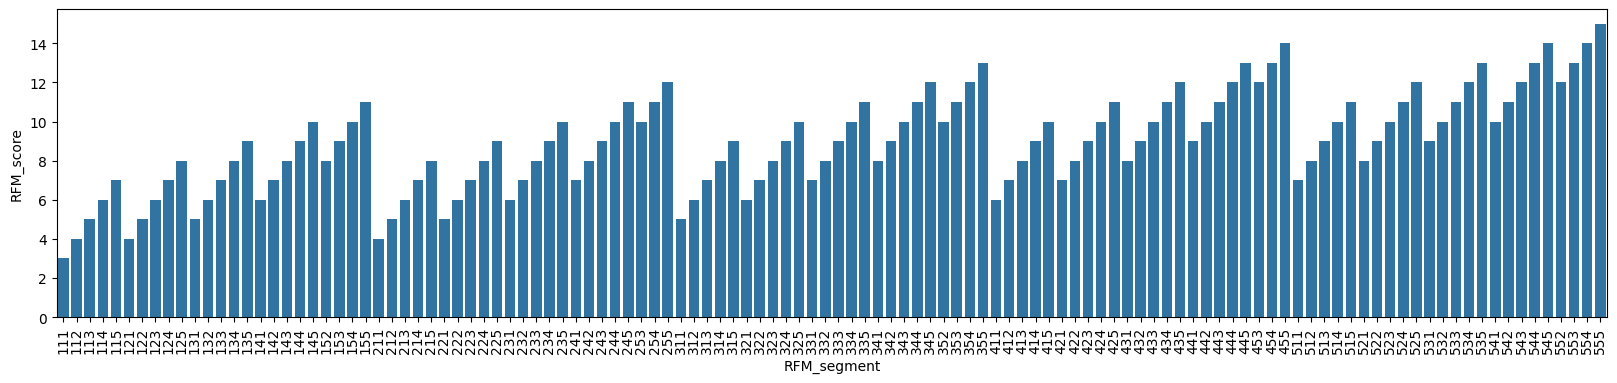

In [66]:
# RFM segment 값에 따라 정렬합니다.
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values(['RFM_segment']), x='RFM_segment', y='RFM_score')

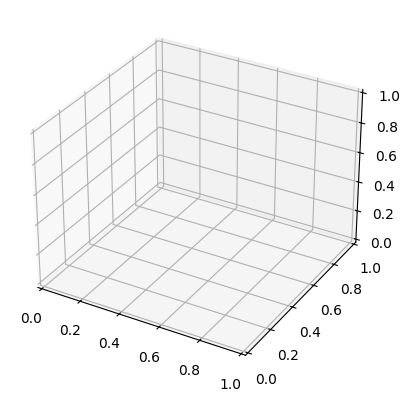

In [32]:
# 3d projection ax.scatter3D rfm["R"], rfm["F"], rfm["M"]
ax = plt.axes(projection='3d')


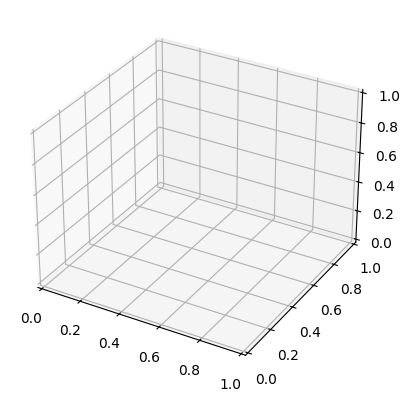

In [33]:
# rfm["Recency"], rfm["Frequency"], rfm["MonetaryValue"]
ax = plt.axes(projection='3d')


In [34]:
# hist


In [35]:
# 문자열의 format 함수를 사용하여 소수점 아래는 표기하지 않도록({:,.0f}) 문자열 포맷을 지정합니다.
# rfm

### qcut을 통한 고객군 나누기

<img src="https://i.imgur.com/4uDIVtm.png" width="700">

In [70]:
# qcut 을 통해 3단계로 "silver", "gold", "platinum" 고객군을 나눕니다.
rfm["RFM_class"] = pd.qcut(x=rfm["RFM_score"], q=3, labels=["silver", "gold", "platinum"])
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver
12347.0,2,182,4310.00,5,5,5,555,15,platinum
12348.0,75,31,1797.24,2,3,4,234,9,gold
12349.0,19,73,1757.55,4,4,4,444,12,platinum
12350.0,310,17,334.40,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver
18281.0,181,7,80.82,1,1,1,111,3,silver
18282.0,8,12,178.05,5,1,1,511,7,silver


In [72]:
# "RFM_class" 별로 그룹화 하고 "RFM_score" 의 describe 값을 구합니다.
rfm.groupby('RFM_class')['RFM_score'].describe()


C:\Users\chobu\AppData\Local\Temp\ipykernel_28488\717670820.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby('RFM_class')['RFM_score'].describe()


,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,1668.0,5.209832,1.384324,3.0,4.0,5.0,6.0,7.0
gold,1409.0,9.469127,1.114505,8.0,8.0,9.0,10.0,11.0
platinum,1261.0,13.471055,1.124120,12.0,12.0,13.0,14.0,15.0


<Axes: xlabel='RFM_class', ylabel='RFM_score'>

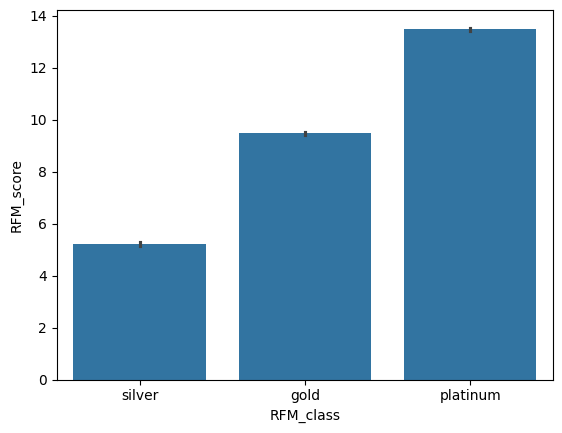

In [73]:
# barplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.barplot(data=rfm, x='RFM_class', y='RFM_score')

In [39]:
# boxplot으로 RFM_class 별 평균 RFM_score 나타냅니다.


<Axes: xlabel='R', ylabel='RFM_score'>

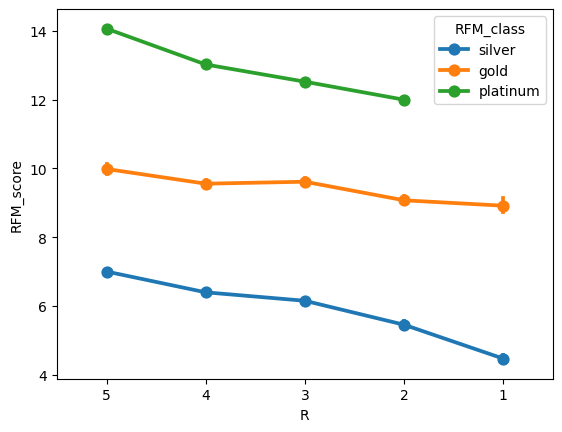

In [75]:
# pointplot으로 x=R, hue=RFM_class 별 평균 y=RFM_score 나타냅니다.
# hue 옵션을 사용하면 특정 컬럼을 지정해서 표기할 수 있습니다.

sns.pointplot(data=rfm, x='R', y='RFM_score', hue='RFM_class')


<Axes: xlabel='F', ylabel='RFM_score'>

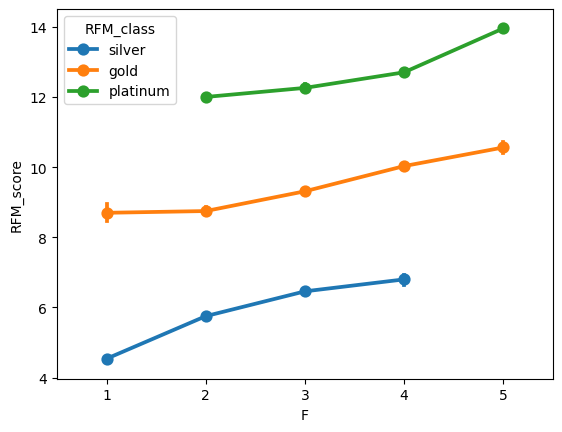

In [76]:
# pointplot으로 x=F, hue=RFM_class 별 평균 y=RFM_score 나타냅니다.

sns.pointplot(data=rfm, x="F", y="RFM_score", hue="RFM_class")

In [77]:
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver
12347.0,2,182,4310.00,5,5,5,555,15,platinum
12348.0,75,31,1797.24,2,3,4,234,9,gold
12349.0,19,73,1757.55,4,4,4,444,12,platinum
12350.0,310,17,334.40,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver
18281.0,181,7,80.82,1,1,1,111,3,silver
18282.0,8,12,178.05,5,1,1,511,7,silver


In [42]:
# pointplot으로 x=M, hue=RFM_class 별 평균 y=RFM_score 나타냅니다.


In [43]:
rfm.columns

Index(['Recency', 'Frequency', 'MonetaryValue'], dtype='object')

In [80]:
# "RFM_class" 별로 그룹화합니다.
# "Recency", "Frequency" 의 평균을 구합니다.
# "MonetaryValue"의 "mean", "sum", "count" 값을 구합니다.

rfm.groupby("RFM_class").agg({"Recency": 'mean', 'Frequency': 'mean', 'MonetaryValue': ['mean', 'sum', 'count']})

C:\Users\chobu\AppData\Local\Temp\ipykernel_28488\1734316145.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby("RFM_class").agg({"Recency": 'mean', 'Frequency': 'mean', 'MonetaryValue': ['mean', 'sum', 'count']})


Recency   Frequency MonetaryValue                   
                 mean        mean          mean          sum count
RFM_class                                                         
silver     170.072542   17.068945    411.232339   685935.542  1668
gold        65.855926   55.664301   1005.104153  1416191.752  1409
platinum    19.949247  226.636796   5247.114988  6616612.000  1261

In [45]:
# 위에서 구한 값을 .style.background_gradient() 통해서 시각화합니다.


In [46]:
#.style.format("{:,}") 로 천단위에 콤마(,)표기 하도록 문자열 포맷을 지정합니다.


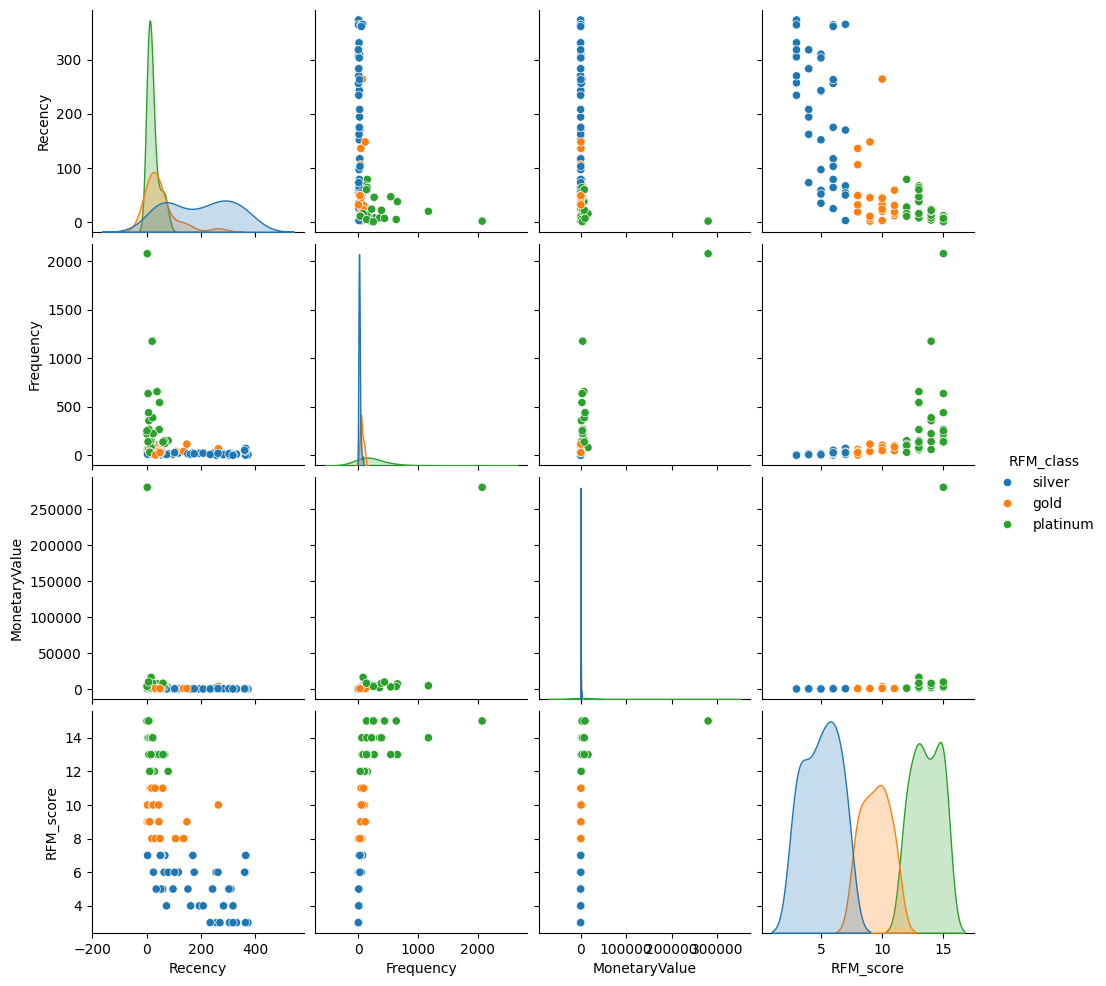

In [81]:
# pairplot 을 통해 "RFM_class" 별로 분포를 시각화 합니다.
sns.pairplot(data=rfm.sample(100), hue='RFM_class')


In [83]:
# .corr() 함수로 변수간 상관관계(선형적 관계)를 분석합니다.
# 1에 가까울 수록 양의 상관관계, -1에 가까울 수록 음의 상관관계를 나타냅니다.
# corr
corr = rfm.select_dtypes(include='number').corr()
corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.206618,-0.122937,-0.700621
Frequency,-0.206618,1.000000,0.444920,0.404260
MonetaryValue,-0.122937,0.444920,1.000000,0.250433
RFM_score,-0.700621,0.404260,0.250433,1.000000


<Axes: >

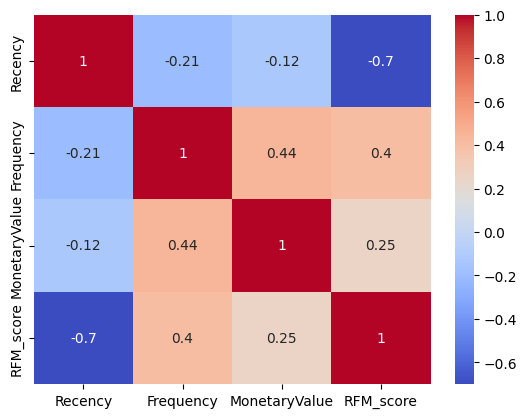

In [85]:
# 삼각형태의 heatmap 형태를 만들기 위해 삼각형 마스크를 만듭니다.
# mask

sns.heatmap(corr, annot=True, cmap='coolwarm')

In [50]:
# 상관관계를 열분포 형태의 이미지로 보여주는 heatmap 으로 데이터 시각화합니다.


In [86]:
# RFM 분석 자료를 csv 로 저장합니다.

rfm.to_csv('data/rfm.csv')


In [87]:
rfm


,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver
12347.0,2,182,4310.00,5,5,5,555,15,platinum
12348.0,75,31,1797.24,2,3,4,234,9,gold
12349.0,19,73,1757.55,4,4,4,444,12,platinum
12350.0,310,17,334.40,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver
18281.0,181,7,80.82,1,1,1,111,3,silver
18282.0,8,12,178.05,5,1,1,511,7,silver


In [88]:
# 저장된 csv 형태의 RFM 분석 자료를 읽어옵니다.

pd.read_csv('data/rfm.csv')

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
0,12346.0,326,1,77183.60,1,1,5,115,7,silver
1,12347.0,2,182,4310.00,5,5,5,555,15,platinum
2,12348.0,75,31,1797.24,2,3,4,234,9,gold
3,12349.0,19,73,1757.55,4,4,4,444,12,platinum
4,12350.0,310,17,334.40,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,278,10,180.60,1,1,1,111,3,silver
4334,18281.0,181,7,80.82,1,1,1,111,3,silver
4335,18282.0,8,12,178.05,5,1,1,511,7,silver
4336,18283.0,4,721,2045.53,5,5,4,554,14,platinum


: 